### One Hot Encoding for Multi Categorical Variables

Categorical data can be divided into two: nominal and ordinal.

#### Ordinal categorical variables

Ordinal data is a statistical data type where there variables have natural, ordered categories and the distances between the categories is not known.

for example: student's grade (A,B,C or grade)

When the categorical variables are ordinal, the most straightforward best approach is to replace the labels by some ordinal number based on the ranks.

#### Nominal categorical variables

A nominal scale describes a variable with categories that do not have a natural order or ranking. You can code nominal variables with numbers if you want, but the order is arbitrary and any calculations, such as computing a mean, median, or standard deviation, would be meaningless.

for example: genotype, blood type, zip code, gender, race, eye color, political party

When the categorical variables are nominal, the most straightforward best approach is one hot encoding.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('train.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
df.head()


,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [12]:
df.shape

(4209, 6)

In [9]:
for col in df.columns:
    print( col, 'has', len(df[col].unique()), 'labels')

X1 has 27 labels
X2 has 44 labels
X3 has 7 labels
X4 has 4 labels
X5 has 29 labels
X6 has 12 labels


In [11]:
pd.get_dummies(df, drop_first=True).shape

(4209, 117)

from six columns now we have 117 columns 

limiting one hot encoding to the 10 most frequent labels of the variable is one of the effective methods in such cases

In [18]:
df['X2'].value_counts().sort_values(ascending=False).head(10)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
Name: X2, dtype: int64

In [19]:
#list of the most frequent labels

top_10=[x for x in df['X2'].value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [23]:
for label in top_10:
    df[label]=np.where(df['X2']==label, 1,0)

In [25]:
df[['X2']+top_10].head()

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0


In [35]:
def one_hot_top_x(df, variable, top_x_labels):
    
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(df[variable]==label,1,0)

In [37]:
df.head()

,X1,X2,X3,X4,X5,X6,as,ae,ai,m,...,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
one_hot_top_x(data, 'X2', top_10)
data.head()

/Users/asap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


and so on ...

### Advantages

* It is very easy to implement
* Does not require hrs of variable exploration
* Does not massively increase dimension of the dataset

### Disadvantages

* Does not add any information that make variable more predictive 
* Does not keep information of the skipped labels

here we have another technique to handle such cases with multi categorical variables

In [40]:
df['X2'].value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'z': 19,
 'ag': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'al': 5,
 'q': 5,
 'an': 5,
 'ah': 4,
 'p': 4,
 'av': 4,
 'au': 3,
 'l': 1,
 'j': 1,
 'ar': 1,
 'c': 1,
 'am': 1,
 'aa': 1,
 'af': 1,
 'o': 1}

In [41]:
df_frequency_map=df['X2'].value_counts().to_dict()

In [43]:
df['X2'].head(10)

0    at
1    av
2     n
3     n
4     n
5     e
6     e
7    as
8    as
9    aq
Name: X2, dtype: object

In [44]:
df['X2']=df['X2'].map(df_frequency_map)

In [45]:
df['X2'].head(10)

0       6
1       4
2     137
3     137
4     137
5      81
6      81
7    1659
8    1659
9      63
Name: X2, dtype: int64

### Advantages

* It is very easy to implement
* Does not increase dimension of the dataset

### Disadvantages

* Same count labels will be replaced by similar number

In [46]:
import datetime

In [48]:
df_base=datetime.datetime.today()
df_date_list=[df_base-datetime.timedelta(days=x) for x in range (0,20)]
df=pd.DataFrame(df_date_list)
df.columns=['day']
df

,day
0,2020-08-06 15:15:27.117122
1,2020-08-05 15:15:27.117122
2,2020-08-04 15:15:27.117122
3,2020-08-03 15:15:27.117122
4,2020-08-02 15:15:27.117122
5,2020-08-01 15:15:27.117122
6,2020-07-31 15:15:27.117122
7,2020-07-30 15:15:27.117122
8,2020-07-29 15:15:27.117122
9,2020-07-28 15:15:27.117122


In [50]:
df['day_of_week']=df['day'].dt.day_name()
df.head()

,day,day_of_week
0,2020-08-06 15:15:27.117122,Thursday
1,2020-08-05 15:15:27.117122,Wednesday
2,2020-08-04 15:15:27.117122,Tuesday
3,2020-08-03 15:15:27.117122,Monday
4,2020-08-02 15:15:27.117122,Sunday


In [51]:
weekday_map={'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

df['day_original']=df['day_of_week'].map(weekday_map)

In [52]:
df

,day,day_of_week,day_original
0,2020-08-06 15:15:27.117122,Thursday,4
1,2020-08-05 15:15:27.117122,Wednesday,3
2,2020-08-04 15:15:27.117122,Tuesday,2
3,2020-08-03 15:15:27.117122,Monday,1
4,2020-08-02 15:15:27.117122,Sunday,7
5,2020-08-01 15:15:27.117122,Saturday,6
6,2020-07-31 15:15:27.117122,Friday,5
7,2020-07-30 15:15:27.117122,Thursday,4
8,2020-07-29 15:15:27.117122,Wednesday,3
9,2020-07-28 15:15:27.117122,Tuesday,2


### Gaussian Transformation

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Others benefit from "Gaussian-like" distributions, as in such distributions the observations of X available to predict vary across a greater range of values. Thus, Gaussian distributed variables may boost the machine learning algorithm performance. 

If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian.

But the main question Lies how can we transform variables so that they follow Gaussian Distribution.

* Logarithmic transformation 
* Reciprocol transformation
* Square root transformation
* Exponential transformation
* Boxcox transformation

#### Linear Regression Assumptions

Linear Regression have following assumptions over the predictor variables X:

Linear relationship with the outcome Y - Multivariate normality - No or little multicollinearity - Homoscedasticity

1. Linear Relationship: Linear Regression needs the relationship between the independent and dependent variables to be linear. This linearity assumption can best be tested with scatter plots. However, as quite obvious the linearity assumption is not valid for polynomial regression. 

2. Multivariate Normality: Regression analysis requires all variables to be multivariate normal. This assumption can best be checked wist a histogram or a Q-Q-plot. Normality can be checked with a goodness of fit test (Kolmogorov, Smirnov test). When the data is not normally distributed a non-linear transformation might fix this problem. 

3. Multicollinearity: Regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. You can use correlation matrix to check if the variables are correlated to each other. You can remove one set of the columns which are correlated while keeping the other.

4. Homoscedasticity: It describes a situation in which the error term is the same across all values of the independent variables. The scatter plot is good way to check wether the data is homoscedastic (meaning that the residuals are equal across the regression line) or not. If Homoscedasticity is present, a non-linear correction might fix the problem. 

#### Do variable Distribution affect any other machine learning models?

The remaining machine learning models, including Neural Networks, Support Vector Machines, Tree based methods and PCA do not make any assumption over the distribution of the independent variables. Usually we get a better model performance from a Gaussian like distributions.

In [54]:
data=pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])

In [55]:
data.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [56]:
data.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [58]:
def impute_data(data, variable):
    
    df=data.copy()
    
    df[variable+'_random']=df[variable]
    
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample
    
    return df[variable+'_random']

In [59]:
data['age']=impute_data(data, 'age')

In [60]:
data.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

### Q-Q plot

In [66]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def diagnostic_plots(df,variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    
    plt.show()

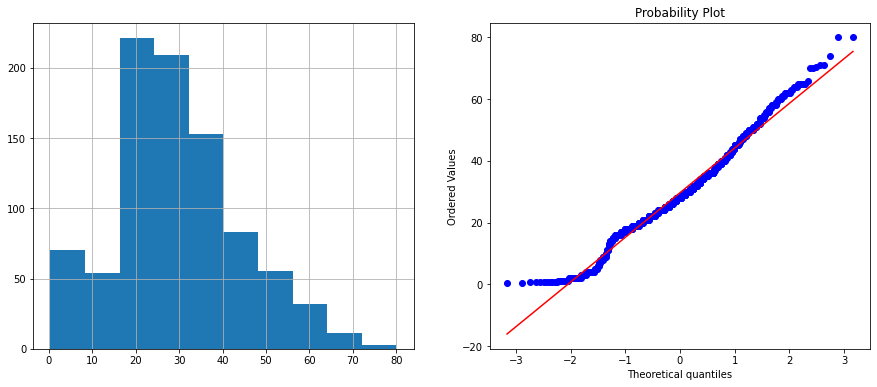

In [67]:
diagnostic_plots(data, 'age')

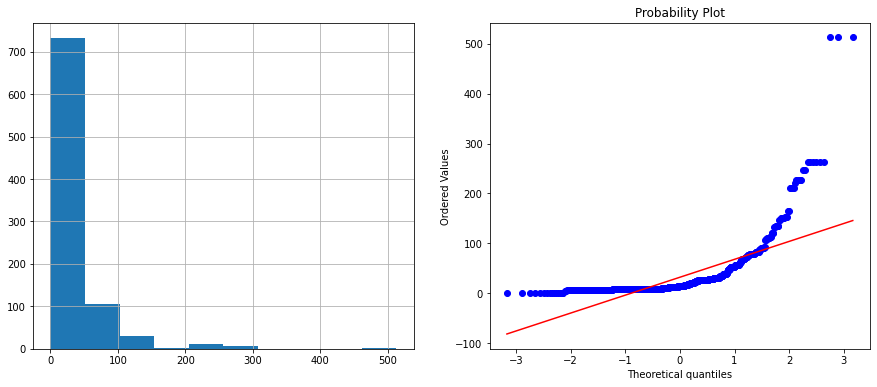

In [68]:
diagnostic_plots(data, 'fare')

#### Logarithmic Transformation

In [71]:
# Since log of 0 zero will not be identified, we add +1

data['Log_Fare']=np.log(data['fare']+1)

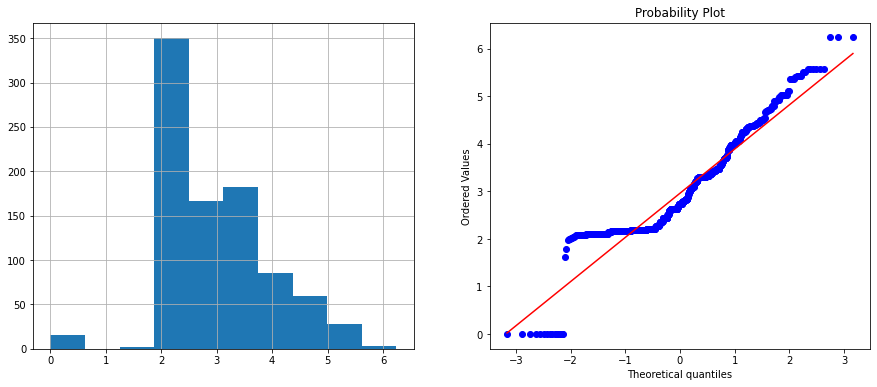

In [72]:
diagnostic_plots(data, 'Log_Fare')

the logarithmic distribution does a good job in making Fare look like Gaussian distribution

#### Reciprocal Transformation

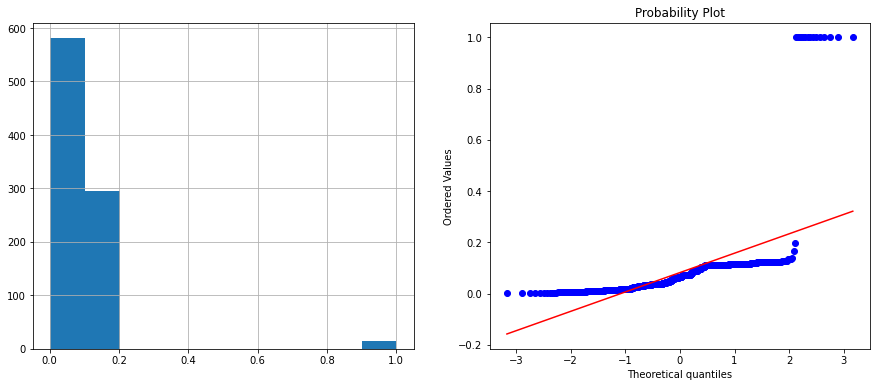

In [74]:
data['Rec_Fare']=1/(data['fare']+1)
diagnostic_plots(data, 'Rec_Fare')

#### Square Root Transformation

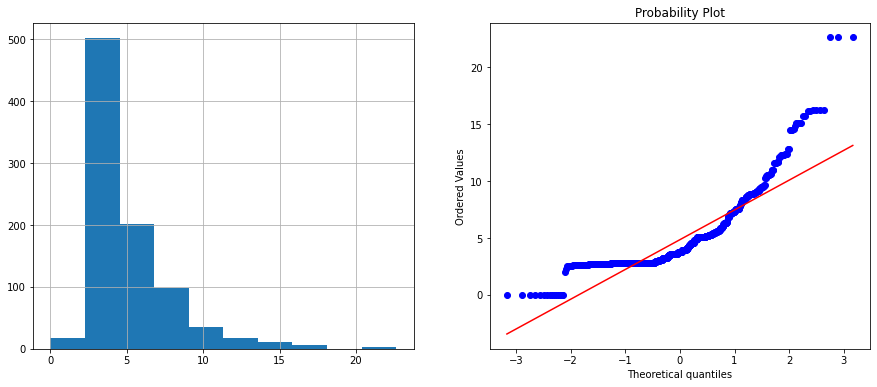

In [75]:
data['Sqr_Fare']=data['fare']**0.5
diagnostic_plots(data, 'Sqr_Fare')

#### Exponential Transformation

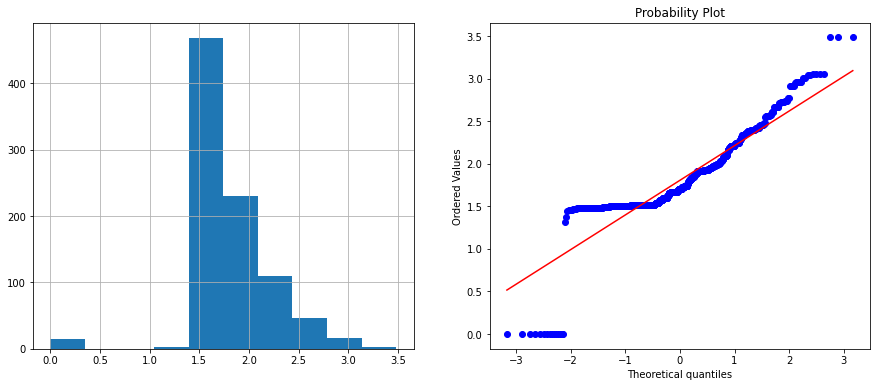

In [76]:
data['Exp_Fare']=data['fare']**0.2
diagnostic_plots(data, 'Exp_Fare')

#### BoxCox Transformation

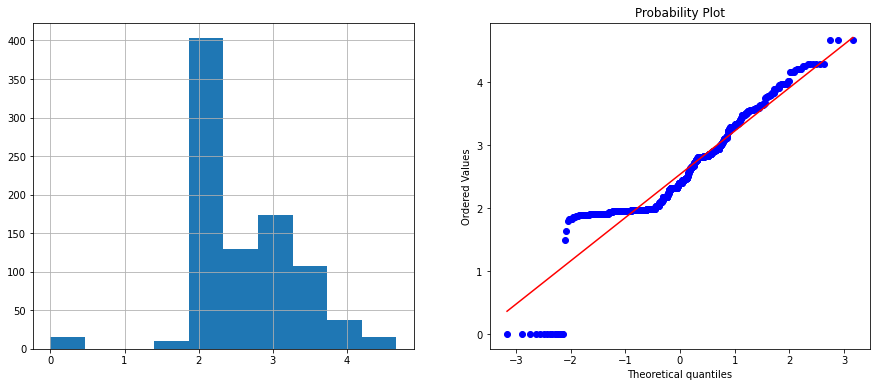

In [77]:
data['Fare_boxcox'], param=stats.boxcox(data['fare']+1)
diagnostic_plots(data, 'Fare_boxcox')